In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
def greenlight(rhomax,x):
    rho=numpy.zeros_like(x)
    mask=numpy.where((x>0)&(x<2))
    rho[mask]=2.5*x[mask]
    return rho
    

In [3]:
#set parameters
rhomax=10
umax=1.1
L=4.0
nx=81
dx=L/(nx-1)

nt=40

x=numpy.linspace(0.0,L,num=nx)

rho0=greenlight(rhomax,x)

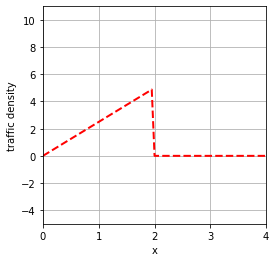

In [4]:
#plot the initial condition:
pyplot.figure(figsize=(4,4))
pyplot.xlim(0,L)
pyplot.ylim(-5,11)
pyplot.xlabel('x')
pyplot.ylabel('traffic density')
pyplot.plot(x,rho0,color='r',linestyle='--',linewidth=2)
pyplot.grid()

In [5]:
def flux(rho,umax,rhomax):
    F=rho*umax*(1-(rho/rhomax))
    return F
    

In [6]:
def ftbs(rho,dt,dx,nt):
    rho_hist=[rho0.copy()]

    rho=rho0.copy()
    for n in  range (nt):
        F=flux(rho,umax,rhomax)
        rho[1:]=rho[1:]-(dt/dx)*(F[1:]-F[:-1])
        rho_hist.append(rho.copy())
    return rho

In [7]:
sigma=1
dt=sigma*(dx/umax)
rho_hist=ftbs(rho0,dt,dx,nt)


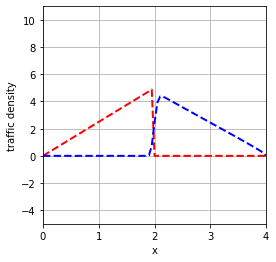

In [8]:
#plot the initial condition:
pyplot.figure(figsize=(4,4))
pyplot.xlim(0,L)
pyplot.ylim(-5,11)
pyplot.xlabel('x')
pyplot.ylabel('traffic density')
pyplot.plot(x,rho0,color='r',linestyle='--',linewidth=2)
pyplot.plot(x,rho_hist,color='b',linestyle='--',linewidth=2)

pyplot.grid()